# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.  
Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*  
Шаги для выбора локации:
- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error

In [2]:
df_0 = pd.read_csv('geo_data_0.csv')
df_1 = pd.read_csv('geo_data_1.csv')
df_2 = pd.read_csv('geo_data_2.csv')

regions = [df_0,df_1,df_2]


In [3]:
for i in regions:
    display(i.head())
    print('_ '*20)
    i.info()
    print('_ '*20)
    print('Количество дубликатов',i.duplicated().sum())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество дубликатов 0


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество дубликатов 0


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество дубликатов 0


Пропуски и дубликаты не обнаружены

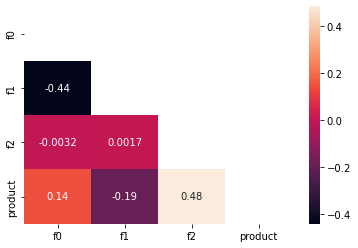

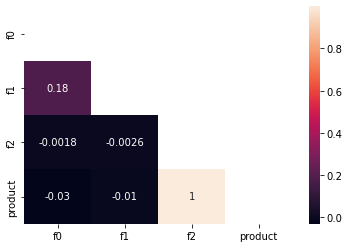

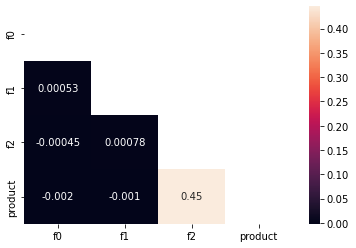

In [4]:
for i in regions:
    matrix = np.triu(i.corr())
    sns.heatmap(i.corr(),annot=True,mask=matrix)
    plt.show()

У всех трех датасетов выраженная корреляция между признаком f2 и целевым признаком.

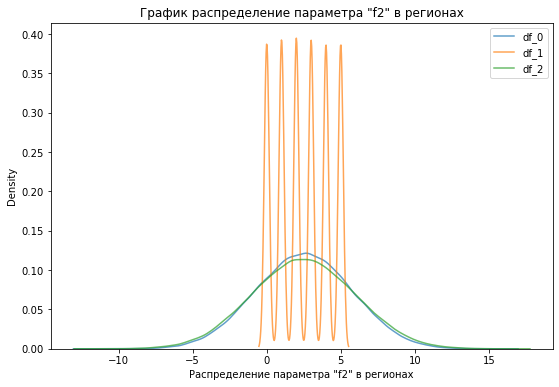

In [5]:
plt.figure(figsize=(9, 6))
sns.kdeplot(df_0['f2'], label="df_0", alpha=.7)
sns.kdeplot(df_1['f2'], label="df_1", alpha=.7)
sns.kdeplot(df_2['f2'],label="df_2", alpha=.7)

plt.title('График распределение параметра "f2" в регионах')
plt.legend()
plt.xlabel('Распределение параметра "f2" в регионах')
plt.show()

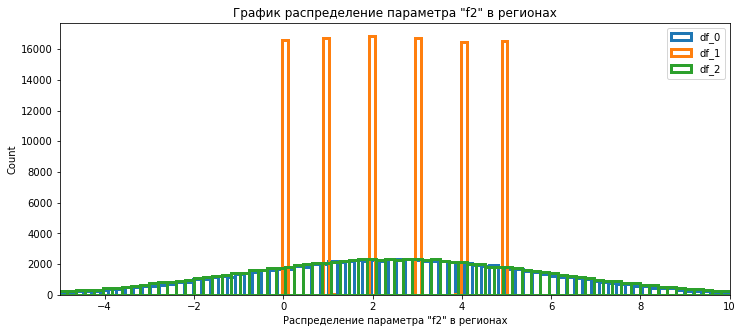

In [6]:
plt.figure(figsize=(12,5))
plt.xlim(-5,10)
plt.title('График распределение параметра "f2" в регионах')
sns.histplot(data = df_0,x = df_0['f2'],fill=False,linewidth=3, label="df_0")
sns.histplot(data = df_1,x = df_1['f2'],fill=False,linewidth=3, label="df_1")
sns.histplot(data = df_2,x = df_2['f2'],fill=False,linewidth=3, label="df_2")
plt.xlabel('Распределение параметра "f2" в регионах')
plt.legend()
plt.show()

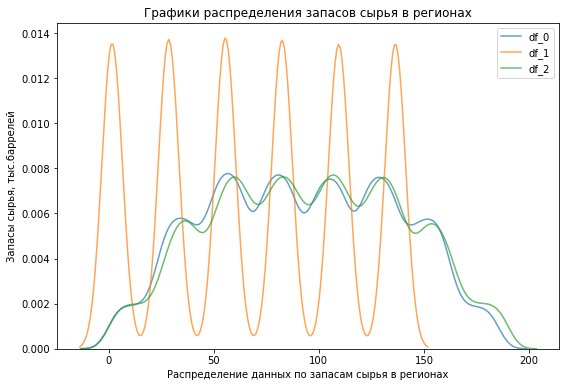

In [7]:
plt.figure(figsize=(9, 6))
sns.kdeplot(df_0['product'], label="df_0", alpha=0.7)
sns.kdeplot(df_1['product'], label="df_1", alpha=0.7)
sns.kdeplot(df_2['product'],label="df_2", alpha=0.7)
 

plt.title('Графики распределения запасов сырья в регионах')
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.legend()
plt.show()

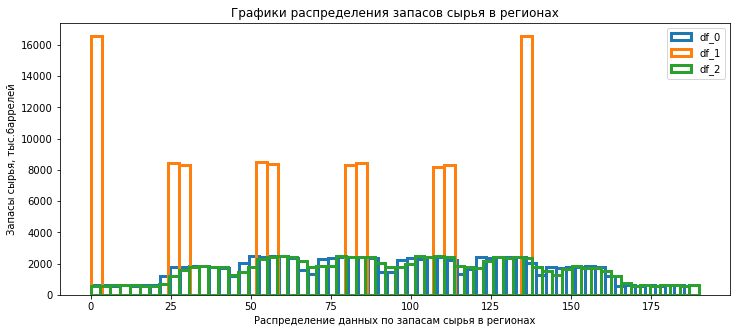

In [8]:
plt.figure(figsize=(12,5))
plt.title('Графики распределения запасов сырья в регионах')
sns.histplot(data = df_0,x = df_0['product'],fill=False,linewidth=3, label="df_0")
sns.histplot(data = df_1,x = df_1['product'],fill=False,linewidth=3, label="df_1")
sns.histplot(data = df_2,x = df_2['product'],fill=False,linewidth=3, label="df_2")
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.legend()
plt.show()

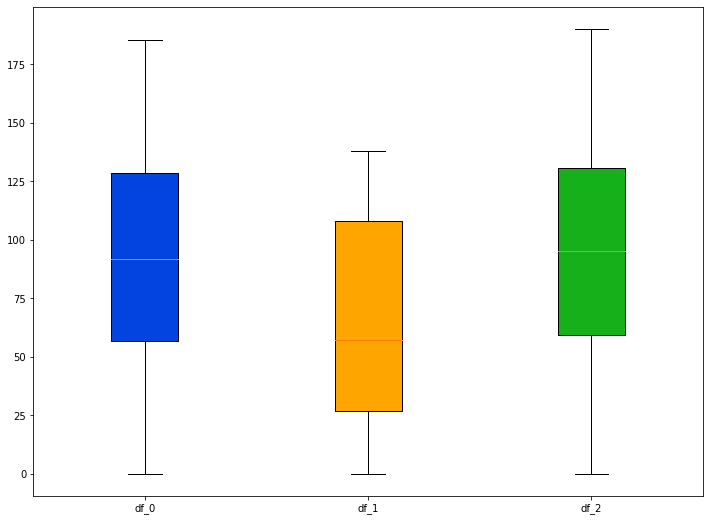

Медиана df_0 91.84997204396296
Медиана df_1 57.08562464628662
Медиана df_2 94.92561258990247


In [9]:
plt.figure(figsize=(12,9))
box = plt.boxplot([df_0['product'],df_1['product'],df_2['product']],
            labels=['df_0','df_1','df_2'],
            patch_artist=True)
colors = ['#0343DF', '#FFA500', '#15B01A']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()
print('Медиана df_0',df_0['product'].median())
print('Медиана df_1',df_1['product'].median())
print('Медиана df_2',df_2['product'].median())

Два региона df_0,df_2 похожи между собой. 
- Корреляция признака f2 и product примерно на одном уровне.Средняя корреляция 0.45-0.48.
- Признак f2 имеет нормальное распределение.
- Целевой признак product имеет схожее распределение.
- Медиана сильно не отличаются.92-95

Регион df_1 сильно отличается от двух других регионов.Корреляция признака f2 у этого региона равна 1,
и это очень сильная зависимость между признаком и целевым признаком.Медиана 57,что сильно ниже других регионов

## Обучение и проверка модели

In [10]:
def make_predictictions (data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']
    features_train,features_valid,target_train,target_valid=train_test_split(features,target,test_size=.25,random_state=12345)
    print('Размер обучающей выборки',features_train.shape)
    print('Размер валидационной выборки',features_valid.shape)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    rmse_valid = mean_squared_error(target_valid,predictions_valid)**0.5 
    print('Средний запас  и rmse  предсказаного сырья', predictions_valid.mean(), rmse_valid)
    return pd.Series(predictions_valid,copy=True), target_valid.reset_index(drop=True)

In [11]:
print('Регион df_0')
predictions_0_valid,target_0_valid = make_predictictions(df_0)

Регион df_0
Размер обучающей выборки (75000, 3)
Размер валидационной выборки (25000, 3)
Средний запас  и rmse  предсказаного сырья 92.59256778438035 37.5794217150813


In [12]:
print('Регион df_1')
predictions_1_valid,target_1_valid = make_predictictions(df_1)

Регион df_1
Размер обучающей выборки (75000, 3)
Размер валидационной выборки (25000, 3)
Средний запас  и rmse  предсказаного сырья 68.728546895446 0.8930992867756167


In [13]:
print('Регион df_2')
predictions_2_valid,target_2_valid = make_predictictions(df_2)

Регион df_2
Размер обучающей выборки (75000, 3)
Размер валидационной выборки (25000, 3)
Средний запас  и rmse  предсказаного сырья 94.96504596800489 40.02970873393434


У первого и третьего региона,средний запас выше,чем у второго.  
У второго среднеквадратичная ошибка и расхождения между target и predictions минимальны.

## Подготовка к расчёту прибыли

In [14]:
money = 10000000000 #бюджет на разработку скважин в каждом регионе
price = 450000 #цена за 1000 баррелей
count = 200 #количество выбранных скважин на каждый регион
value = money/(price*count) # необходимый объем тысяч баррелей для безубыточности
print('Необходимый объем тысяч баррелей для безубыточности',value)

Необходимый объем тысяч баррелей для безубыточности 111.11111111111111


In [15]:
def revenue (target,predictions,count):
    probs_sorted = predictions.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return sum(selected)* price - money #объем запасов в скважине умножаем на стоимость и вычитаем расходы

In [16]:
print('Средний объем в одной скважине в первом регионе',df_0['product'].mean())
print('Средний объем в одной скважине во втором регионе',df_1['product'].mean())
print('Средний объем в одной скважине в третьем регионе',df_2['product'].mean())

Средний объем в одной скважине в первом регионе 92.49999999999974
Средний объем в одной скважине во втором регионе 68.82500000002561
Средний объем в одной скважине в третьем регионе 95.00000000000041


Если судить по среднему для каждого региона,то в каждом регионе среднее меньше необходимого количества баррелей для безубыточности. Средний объем в одной скважине в регионе df_1 наименьший.

## Расчёт прибыли и рисков 

In [17]:
profit_0 = revenue(target_0_valid,predictions_0_valid,200)
print('Прибыль первого региона',profit_0)

Прибыль первого региона 3320826043.1398544


In [18]:
profit_1 = revenue(target_1_valid,predictions_1_valid,200)
print('Прибыль второго региона',profit_1)

Прибыль второго региона 2415086696.681551


In [19]:
profit_2 = revenue(target_2_valid,predictions_2_valid,200)
print('Прибыль третьего региона',profit_2)

Прибыль третьего региона 2710349963.5998363


In [20]:
def boots (target, predictions):
    state = np.random.RandomState(12345) 
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True)
        preds_subsample = predictions[target_subsample.index]  
        values.append(revenue(target_subsample, preds_subsample,200)) 
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)
    mean = values.mean()
    
    print('Средняя выручка',mean)
    print('Верхняя граница доверительного интервала', higher)
    print('Нижняя граница доверительного интервала', lower)
    print('Риск убытков региона равен',(values < 0).mean()* 100, "%")
    
print('Для первого региона df_0')
boots(target_0_valid,predictions_0_valid)
print()
print('Для второго региона df_1')
boots(target_1_valid,predictions_1_valid)
print()
print('Для третьего региона df_2')
boots(target_2_valid,predictions_2_valid)

Для первого региона df_0
Средняя выручка 425151011.9246163
Верхняя граница доверительного интервала 962849011.3137126
Нижняя граница доверительного интервала -84988537.00934061
Риск убытков региона равен 4.9 %

Для второго региона df_1
Средняя выручка 517281712.32023466
Верхняя граница доверительного интервала 943777633.4501419
Нижняя граница доверительного интервала 73849212.02249078
Риск убытков региона равен 1.0 %

Для третьего региона df_2
Средняя выручка 432314546.489199
Верхняя граница доверительного интервала 928120635.3484013
Нижняя граница доверительного интервала -103472745.08673143
Риск убытков региона равен 7.1 %


## Общий вывод

Регион df_1 больше всего подходит для разработки скважин.
Вероятность получить убытки меньше 2,5% ,имеет регион df_1,так же у региона самый низкий процент вероятности получить убытки, по сравнению с другими регионами. Регион df_1 имеет наибольшую среднюю выручку,по сравнению с остальными регионами.
